# Logistic Regression : 

In this lab we will build a logistic regression model and also we will understand how it works , it's necessary to know how the linear regression and polynom regression work, also know the functions as gradient descente and the cost function .

### 1.Importing the libiraries : 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### 2.The problem : 

Suppose you are the administrator of a university department and you want to determine the probability of admission for each candidate based on their results from two exams.

- You have historical data from previous candidates that you can use as a training set for logistic regression.
- For each training example, you have the candidates' scores from two exams and the admission decision.
- our task is to build a classification model that estimates the probability of admission for a candidate based on the scores obtained in these two exams.

### 3.data set : 

The data set contient the exams results and the the admission for each condidate :
- X_train : contient the notes of each condidate 
- Y_train : contient the result 
* 1 : pass
* 0 : not pass 

In [4]:
def load_data(filename):
    data = np.loadtxt(filename, delimiter=',')
    X = data[:,:2]
    y = data[:,2]
    return X, y
# load dataset
X_train, Y_train = load_data(r"C:\Users\hp\Documents\Apprentissage Automatique\data1.txt")

In [5]:
print('the shape of x_train :', X_train.shape)
print('the shape of Y_train:', Y_train.shape)

the shape of x_train : (100, 2)
the shape of Y_train: (100,)


### 4. visualizing the data :


In this section we will visualize the data using the scatter plot :

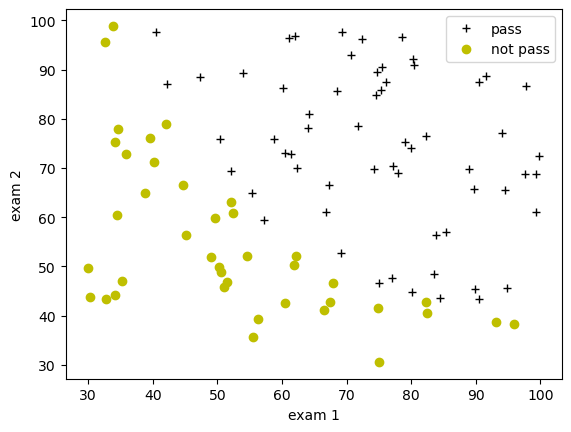

In [9]:
def plot_data(X, Y, pos_lab = 'Y=1', neg_lab='Y=0'):
    pos = Y == 1
    neg = Y == 0
    plt.plot(X[pos, 0], X[pos, 1], 'k+', label= pos_lab)
    plt.plot(X[neg, 0], X[neg, 1], 'yo', label= neg_lab)
plot_data(X_train, Y_train[:], pos_lab='pass', neg_lab='not pass')
plt.ylabel('exam 2')
plt.xlabel('exam 1')
plt.legend(loc='upper right')
plt.show()

###### so so the objective is to separate the two colors in the graph ==> logistic regression 

### 5.The segmoid funtion :

- The segmoid function or logistic function is represented by the formula :  **g(z) = 1 / (1 + e-z)**

- so the logistic regression is represented by the formula :   **f w,b(x) = g(wx + b ) = 1 / (1 + e-(wx + b))**

#### Implimentatio of this function :

In [18]:
def sigmoid(Z):
    '''
    z : parameter of the function
    Return : the calculation of the formula 
    '''
    return (1 / (1 + np.exp(-Z)))

In [21]:
## examples :
print(sigmoid(19))
print(sigmoid(1))
print(sigmoid(-75))

0.9999999943972036
0.7310585786300049
2.678636961808078e-33


### 6. The cost function of regression logistic :

- we know the cost function of the linear regression with the formula : **J(w,b) = 1/(2*m) * segma(1-->m)((f(xm) - ym) ** 2 )**
- so the same of the logistic regression : **J(w,b) = 1/(2*m) * segma(1-->m)(loss(f(xm), ym))**

the loss function is :
- **loss(f(xm), ym) = -ym * log(f(xm)) -(1-ym) * log(1 - f(xm))**

if the **loss >= 0.5** ==> the predict class is **1**     if not the class is **0**

#### Implimetation for this function :

In [30]:
def Compute_cost(X, Y, w, b, *argv):
    '''
    X: the data without the target variable 
    Y: the target variable 
    w: the first hyperpatameter of the model
    b : the second hyperparameter of the model
    *argv : other parameter...
    Return: the value of the cost 
    '''
    n, m = X.shape
    loss = 0
    for i in range(n):
        loss += (- Y[i] * np.log(sigmoid(np.dot(X[i], w) + b))) - ((1 - Y[i]) * np.log(1 - sigmoid(np.dot(X[i], w) + b)))

    return (1 / (n)) * loss

In [35]:
# example :
# Compute and display cost with w and b initialized to zeros
n, m = X_train.shape
initial_w = np.zeros(m)
initial_b = 0.
cost = Compute_cost(X_train, Y_train, initial_w, initial_b)
print('Cost at initial w and b (zeros):{:.3f}'.format(cost))
# Compute and display cost with non-zero w and b
test_w = np.array([0.2, 0.2])
test_b = -24.
cost = Compute_cost(X_train, Y_train, test_w, test_b)
print('Cost at test w and b (non-zeros): {:.3f}'.format(cost))

Cost at initial w and b (zeros):0.693
Cost at test w and b (non-zeros): 0.218


### 7. Gradient descente :

we have to calculate two element : the compute gradient and also the algorithm of gradient descente

#### Compute gradient :

In [44]:
def Compute_gradient(X, Y, w, b, *argv):
    '''
    X: the data without the target variable 
    Y: the target variable 
    w: the first hyperpatameter of the model
    b : the second hyperparameter of the model
    *argv : other parameter...
    Return: the value of the cost 
    '''
    n, m = X.shape
    dj_w = np.zeros(m)
    dj_b = 0
    for i in range(n):
        for j in range(m):
            dj_w[j] += (sigmoid(np.dot(X[i], w) + b) - Y[i]) * X[i][j]
        dj_b += (sigmoid(np.dot(X[i], w) + b) - Y[i])

    dj_w *= (1 / n)
    dj_b *= (1 / n)
    return dj_w, dj_b

In [45]:
# examples :
# Compute and display gradient with w and b initialized to zeros
n, m = X_train.shape
initial_w = np.zeros(m)
initial_b = 0.
dj_w, dj_b = Compute_gradient(X_train, Y_train, initial_w, initial_b)
print(f'dj_db at initial w and b (zeros):{dj_b}' )
print(f'dj_dw at initial w and b (zeros):{dj_w.tolist()}' )
# Compute and display cost and gradient with non-zero w and b
test_w = np.array([ 0.2, -0.5])
test_b = -24
dj_w, dj_b = Compute_gradient(X_train, Y_train, test_w, test_b)
print('dj_b at test w and b:', dj_b)
print('dj_w at test w and b:', dj_w.tolist())

dj_db at initial w and b (zeros):-0.1
dj_dw at initial w and b (zeros):[-12.00921658929115, -11.262842205513591]
dj_b at test w and b: -0.5999999999991071
dj_w at test w and b: [-44.831353617873795, -44.37384124953979]


#### gradient descente :


In [50]:
import math

In [59]:
def gradient_descente(X, Y, w_in, b_in, alpha, num_iter, lambda_):
    '''
    X: the data without the target variable
    Y: the target variable
    w_in: the first hyperparameter 
    b_in: the second hyperparameter
    alpha: the learning rate
    num_iter: the number of iteration
    Return: the optimization of the coefficeints
    '''
    n = X.shape[0]
    J_histo = []
    w_histo = []

    for i in range(num_iter):
        # calculating the compute gradient :
        dj_w, dj_b = Compute_gradient(X, Y, w_in, b_in, lambda_)

        # updating the the hyperparameters :
        w_in = w_in - alpha * dj_w
        b_in = b_in - alpha * dj_b

        if i < 100000:
            cost = Compute_cost(X, Y, w_in, b_in, lambda_)
            J_histo.append(cost)


        if i % math.ceil(num_iter / 10) == 0 or i == (num_iter - 1):
            w_histo.append((w_in, b_in))
            print(f"Iteration {i:4}: Cost {float(J_histo[-1]):8.2f} ")

    return w_in, b_in, J_histo, w_histo

In [68]:
#examples :
np.random.seed(1)
initial_w = 0.01 * (np.random.rand(2) - 0.5)
initial_b = -8
# Some gradient descent settings
iterations = 10000
alpha = 0.001
w,b, J_history,_ = gradient_descente(X_train ,Y_train, initial_w, initial_b, alpha, iterations, 0)

Iteration    0: Cost     0.96 
Iteration 1000: Cost     0.31 
Iteration 2000: Cost     0.30 
Iteration 3000: Cost     0.30 
Iteration 4000: Cost     0.30 
Iteration 5000: Cost     0.30 
Iteration 6000: Cost     0.30 
Iteration 7000: Cost     0.30 
Iteration 8000: Cost     0.30 
Iteration 9000: Cost     0.30 
Iteration 9999: Cost     0.30 


In [69]:
print(w, b)

[0.07125355 0.06482888] -8.188622906639248


In [58]:
#examples :
np.random.seed(1)
initial_w = 0.01 * (np.random.rand(2) - 0.5)
initial_b = -8
# Some gradient descent settings
iterations = 100000
alpha = 0.001
w,b, J_history,_ = gradient_descente(X_train ,Y_train, initial_w, initial_b, alpha, iterations, 0)

Iteration    0: Cost     0.96 
Iteration 10000: Cost     0.30 
Iteration 20000: Cost     0.30 
Iteration 30000: Cost     0.30 
Iteration 40000: Cost     0.29 
Iteration 50000: Cost     0.29 
Iteration 60000: Cost     0.29 
Iteration 70000: Cost     0.28 
Iteration 80000: Cost     0.28 
Iteration 90000: Cost     0.28 
Iteration 99999: Cost     0.28 


In [60]:
print(w,b)

[0.08281281 0.0765327 ] -9.663213337784999


### 8. Implementaion of predict function :

In [70]:
def Predict(X, w, b):
    '''
    X: the data without the target varaible
    Y: the target varaible
    w: the first hyperparameter
    b: the second hyperparameter
    Return: the predictions !
    '''
    n, m = X.shape
    predictions = np.zeros(n)

    for i in range(n):
        s = sigmoid(np.dot(X[i], w) + b)
        if s >= 0.5 :
            predictions[i] = 1
        else:
            predictions[i] = 0


    return predictions

In [71]:
# testing 
p = Predict(X_train, w, b)
print('Train Accuracy: %f'%(np.mean(p == Y_train) * 100))

Train Accuracy: 92.000000


..............